# Case Study on Probability for Data Science

Problem Statement:<br>
To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Data Pre-Processing

## Label Encoding

In [7]:
#label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Feature Reduction

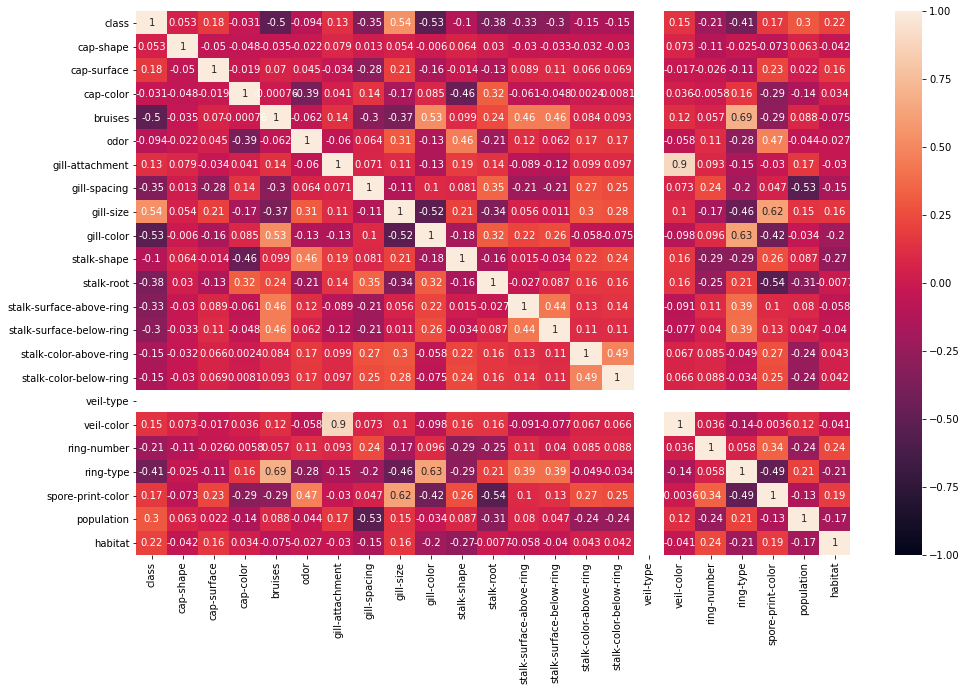

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,vmin=-1)
plt.show()

In [9]:
data['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

The column “veil-type” is 0 and not contributing to the data so can be removed.

In [10]:
data.drop(['veil-type'],axis=1,inplace=True)

In [11]:
x=data.drop(['class'],axis=1)
y=data.iloc[:,0].values

In [12]:
#splitting the model for traing and validating
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [13]:
import warnings
warnings.filterwarnings('ignore')

# Classification Models

## 1. Decision Tree Classification

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [15]:
#evaluating the performance of the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[1040    0]
 [   0  991]]

Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## 2.Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [17]:
#evaluating the performance of the model
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[989  51]
 [ 51 940]]

Classification report
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1040
           1       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



## 3.Support Vector Machine

In [18]:
#Radial svm
from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [19]:
#evaluating the performance of the model
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[1038    2]
 [  14  977]]

Classification report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1040
           1       1.00      0.99      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



## 4.Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [21]:
#evaluating the performance of the model
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[1040    0]
 [   0  991]]

Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## 5.Naive Bayes Classification

### Flavor: Gaussian

In [22]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [23]:
#evaluating the performance of the model
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[958  82]
 [ 67 924]]

Classification report
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1040
           1       0.92      0.93      0.93       991

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031



### Flavor: Bernoulli

In [24]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [25]:
#evaluating the performance of the model
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[984  56]
 [260 731]]

Classification report
               precision    recall  f1-score   support

           0       0.79      0.95      0.86      1040
           1       0.93      0.74      0.82       991

    accuracy                           0.84      2031
   macro avg       0.86      0.84      0.84      2031
weighted avg       0.86      0.84      0.84      2031



Out of all the classification models, Decision Tree and Random Forest Model give the highest accuracy.